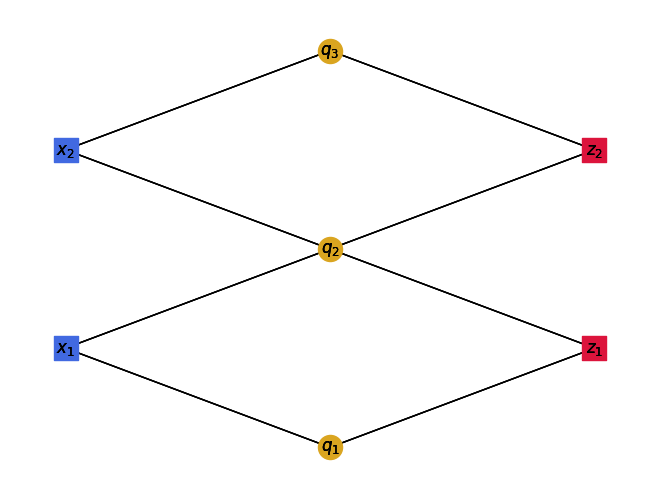

In [2]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
import networkx.algorithms.bipartite as bpt
import matplotlib.pyplot as plt

from basic_css_code import construct_HGP_code

# H = np.array([
# [1, 1, 1, 0, 0, 0],
# [0, 1, 0, 1, 1, 0],
# [1, 0, 0, 1, 0, 1],
# [0, 0, 1, 0, 1, 1],
# ])
H = np.array([
    [1, 1, 0],
    [0, 1, 1]
])
Hx, Hz = construct_HGP_code(H)

G = bpt.from_biadjacency_matrix(sp.csr_array(H))

m, n = H.shape
sp.dok_array(H).keys()
x_labels = lambda c, v: (f'$x_{{{c+1}}}$', f'$q_{{{v+1}}}$')
z_labels = lambda c, v: (f'$z_{{{c+1}}}$', f'$q_{{{v+1}}}$')
x_edges = [x_labels(*e) for e in sp.dok_array(H).keys()]
z_edges = [z_labels(*e) for e in sp.dok_array(H).keys()]
Q = nx.Graph()
q_nodes = [f'$q_{{{v+1}}}$' for v in range(n)]
x_nodes = [f'$x_{{{c+1}}}$' for c in range(m)]
z_nodes = [f'$z_{{{c+1}}}$' for c in range(m)]
Q.add_nodes_from(x_nodes, layer=0)
Q.add_nodes_from(q_nodes, layer=1)
Q.add_nodes_from(z_nodes, layer=2)
Q.add_edges_from(x_edges)
Q.add_edges_from(z_edges)

pos = nx.multipartite_layout(Q, subset_key='layer')
for lbl, p in zip(q_nodes, np.sort([pos[lbl] for lbl in q_nodes], axis=0)):
    pos[lbl] = p
for lbl, p in zip(x_nodes, np.sort([pos[lbl] for lbl in x_nodes], axis=0)):
    pos[lbl] = p
for lbl, p in zip(z_nodes, np.sort([pos[lbl] for lbl in z_nodes], axis=0)):
    pos[lbl] = p

colors = ['darkblue', 'mediumorchid', 'red']

x_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 0]
q_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 1]
z_nodelist = [v for v, d in Q.nodes(data=True) if d['layer'] == 2]

nx.draw(Q, pos, nodelist=x_nodelist, node_color='#4169E1', node_shape='s', with_labels=True, label='X nodes')
nx.draw(Q, pos, nodelist=q_nodelist, node_color='#DAA520', node_shape='o', with_labels=True, label='Q nodes')
nx.draw(Q, pos, nodelist=z_nodelist, node_color='#DC143C', node_shape='s', with_labels=True, label='Z nodes')
plt.show()

Hx: 
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]] 
Hz: 
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]


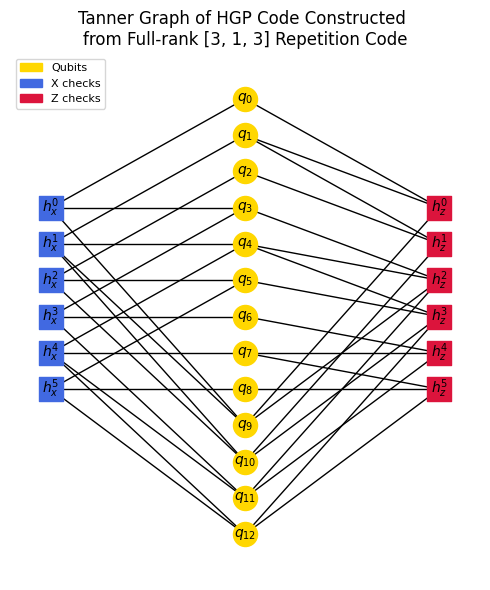

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.sparse as sp

# Draw HGP Tanner graph correctly
def draw_hgp_tanner_graph(Hx, Hz):
    plt.figure(figsize=(5, 6))
    m_x, n = Hx.shape
    m_z, _ = Hz.shape

    print(f"Hx: \n{Hx.toarray()} \nHz: \n{Hz.toarray()}")

    G = nx.Graph()

    # Internal node names
    qubit_nodes = [f'q{i}' for i in range(n)]
    x_nodes = [f'hx{i}' for i in range(m_x)]
    z_nodes = [f'hz{i}' for i in range(m_z)]

    G.add_nodes_from(qubit_nodes, bipartite='qubit')
    G.add_nodes_from(x_nodes, bipartite='X')
    G.add_nodes_from(z_nodes, bipartite='Z')

    Hx = Hx.tocsr(copy=True)
    Hz = Hz.tocsr(copy=True)

    # Edges from Hx
    for i in range(m_x):
        for j in Hx[i].indices:
            if Hx[i, j] == 1:
                G.add_edge(f'hx{i}', f'q{j}')
            
            

    # Edges from Hz
    for i in range(m_z):
        for j in Hz[i].indices:
            if Hz[i, j] == 1:
                G.add_edge(f'hz{i}', f'q{j}')

    # Manual layout
    pos = {}
    spacing = 0.5
    for i, node in enumerate(x_nodes):
        pos[node] = [-1, -1.5 -i * spacing]
    for i, node in enumerate(qubit_nodes):
        pos[node] = [0, -i * spacing]
    for i, node in enumerate(z_nodes):
        pos[node] = [1, -1.5 -i * spacing]

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=qubit_nodes, node_color='gold', node_shape='o')
    nx.draw_networkx_nodes(G, pos, nodelist=x_nodes, node_color='royalblue', node_shape='s')
    nx.draw_networkx_nodes(G, pos, nodelist=z_nodes, node_color='crimson', node_shape='s')

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw labels (with LaTeX-style display)
    labels = {}
    for node in qubit_nodes:
        i = int(node[1:])
        labels[node] = f'$q_{{{i}}}$'
    for node in x_nodes:
        i = int(node[2:])
        labels[node] = f'$h_x^{{{i}}}$'
    for node in z_nodes:
        i = int(node[2:])
        labels[node] = f'$h_z^{{{i}}}$'

    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Legend
    legend_elements = [
        mpatches.Patch(color='gold', label='Qubits'),
        mpatches.Patch(color='royalblue', label='X checks'),
        mpatches.Patch(color='crimson', label='Z checks')
    ]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1), fontsize=8)

    plt.title("Tanner Graph of HGP Code Constructed \nfrom Full-rank [3, 1, 3] Repetition Code")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_hgp_tanner_graph(Hx, Hz)